In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats #to plot QQplot

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('Titanic-Dataset.csv',usecols=['Age','Fare','Survived'])

In [3]:
df['Age'] = df['Age'].fillna(df['Age'].mean()).infer_objects(copy=False)


In [4]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Applying QQplot to find out skewness

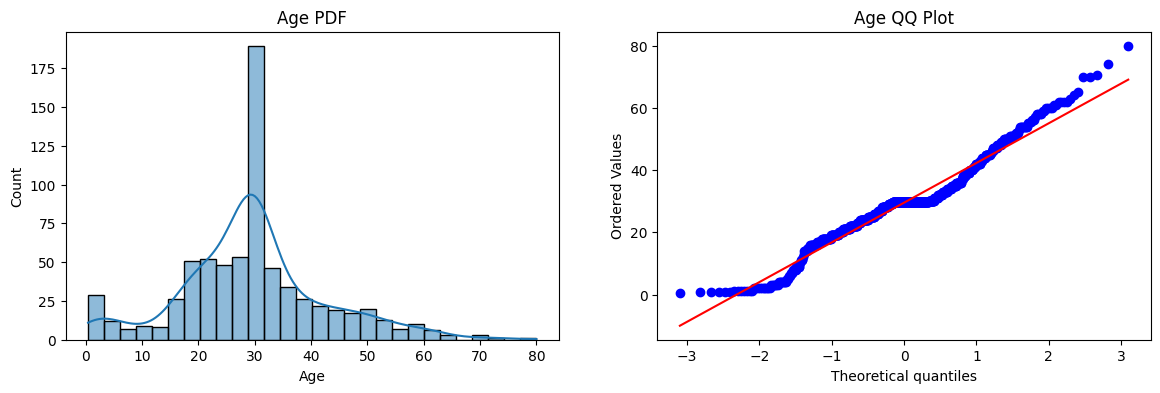

In [7]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(X_train['Age'],kde=True)
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'],dist="norm",plot=plt)
plt.title('Age QQ Plot')
plt.show()

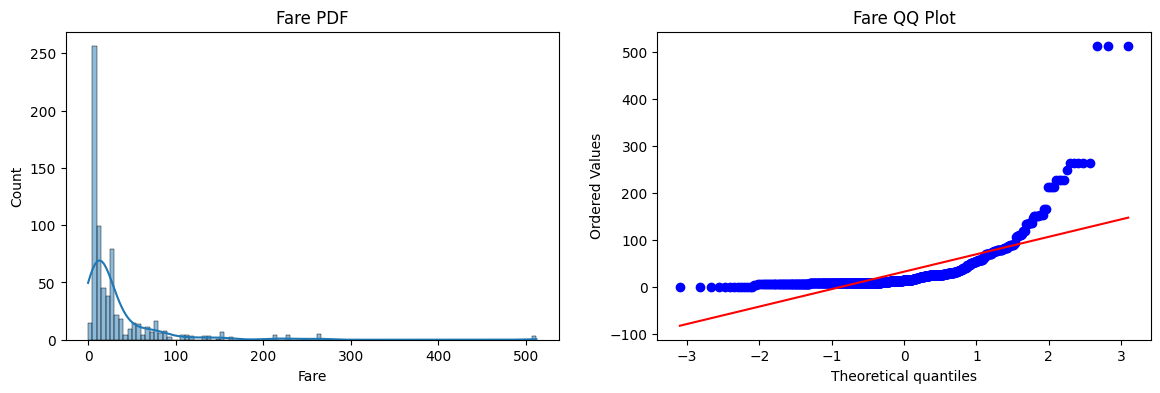

In [8]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(X_train['Fare'],kde=True)
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'],dist="norm",plot=plt)
plt.title('Fare QQ Plot')
plt.show()

Without Transformation :-


In [9]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [10]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

DecisionTreeClassifier()

In [11]:
y_pred = clf.predict(X_test)
y_pred2 = clf2.predict(X_test)
print("Accuracy LR:",accuracy_score(y_test,y_pred)*100," %")
print("Accuracy DT:",accuracy_score(y_test,y_pred2)*100, " %")

Accuracy LR: 64.80446927374301  %
Accuracy DT: 67.59776536312849  %


Now Applying Function Transformer

In [12]:
trf = FunctionTransformer(func=np.log1p)

In [13]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [14]:
'''clf = LogisticRegression()
clf2 = DecisionTreeClassifier()'''
clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

y_predict = clf.predict(X_test_transformed)
y_predict2  = clf2.predict(X_test_transformed)
print("Accuracy LR:",accuracy_score(y_test,y_predict)*100," %")
print("Accuracy DT:",accuracy_score(y_test,y_predict2)*100, " %")

Accuracy LR: 68.15642458100558  %
Accuracy DT: 67.59776536312849  %


Cross Validating

In [15]:
#Train test splitting 10 times and then finding the mean
X_transformed = trf.fit_transform(X)
print("LR : ",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT : ",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR :  0.678027465667915
DT :  0.6577403245942571


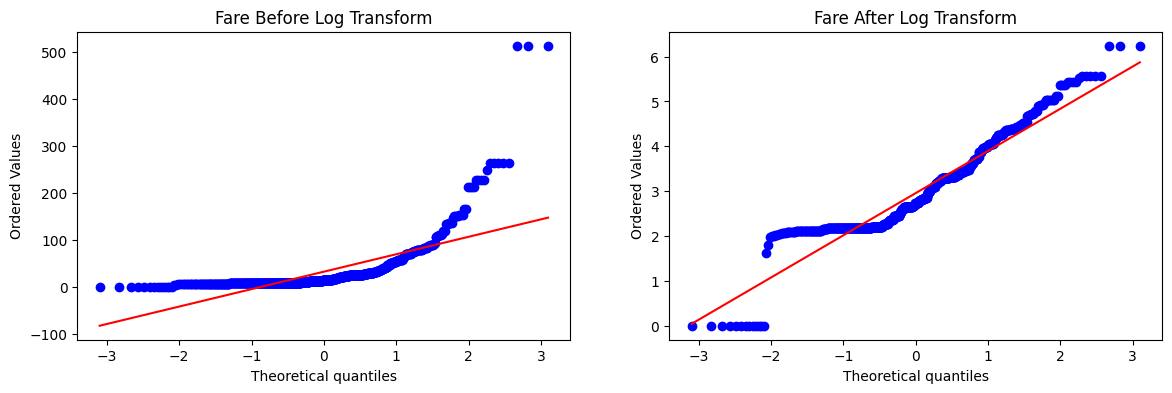

In [16]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Fare'],dist="norm",plot=plt)
plt.title('Fare Before Log Transform')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'],dist="norm",plot=plt)
plt.title('Fare After Log Transform')
plt.show()

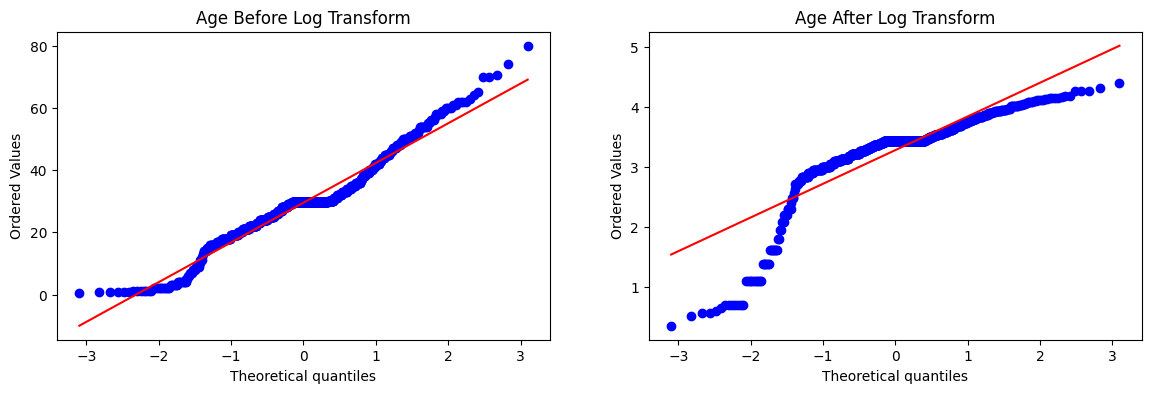

In [17]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Age'],dist="norm",plot=plt)
plt.title('Age Before Log Transform')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'],dist="norm",plot=plt)
plt.title('Age After Log Transform')
plt.show()

In [18]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [19]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)
    
y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.659217877094972


In [20]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6621972534332085


Custom Function Transformer

In [21]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()
    

Accuracy 0.6589013732833957


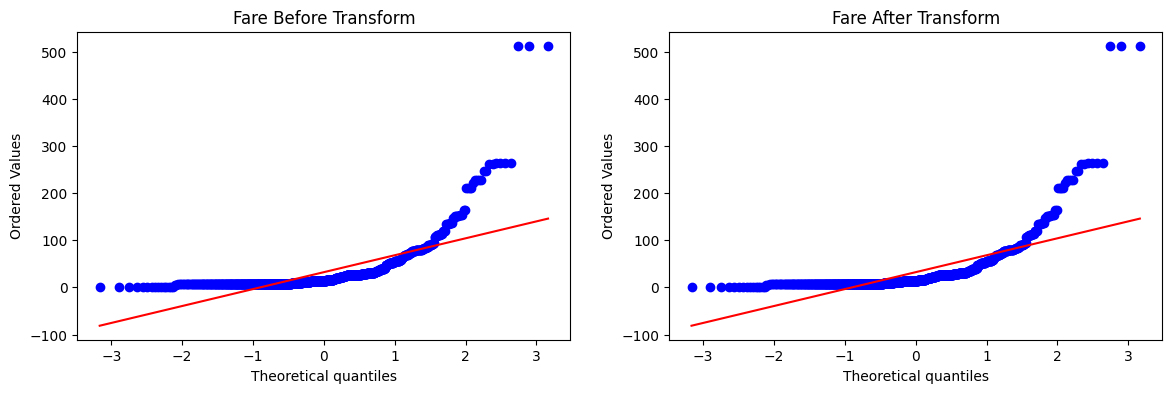

In [22]:
apply_transform(lambda x:x)

Accuracy 0.6431335830212235


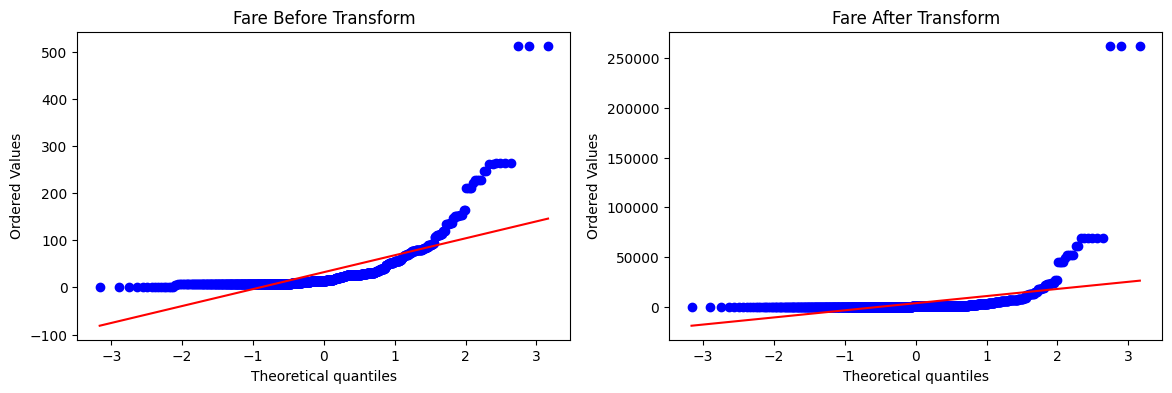

In [23]:
apply_transform(lambda x : x**2)

Accuracy 0.61729088639201


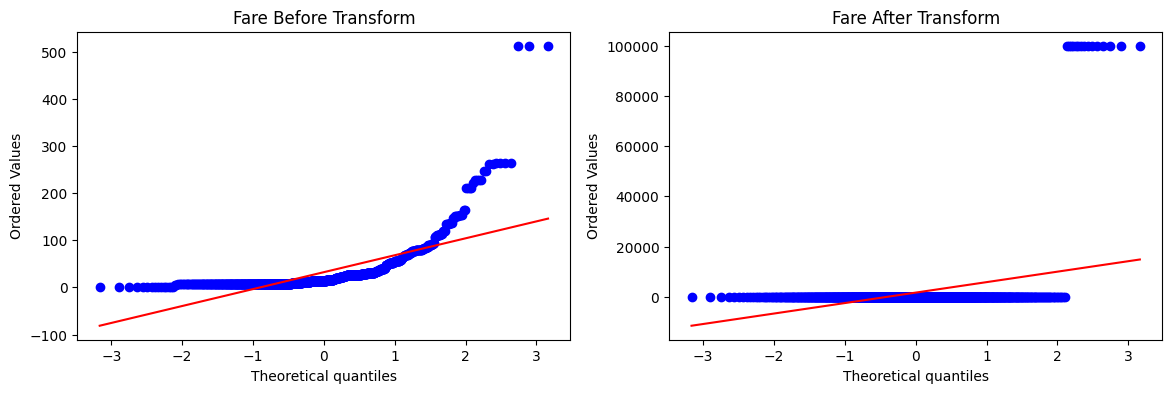

In [24]:
apply_transform(lambda x: 1/(x+0.00001))